#Load and Explore the Dataset

In [32]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv')
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [33]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [35]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [36]:
df.dropna(inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


#Features Scaling(very important for SVR)




In [38]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']]
y = df[['Salary']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)


#Flatten y for SVR

In [39]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [40]:
y_scaled = y_scaled.ravel()

In [41]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

#Train SVR Model(RBF Kernel)

In [42]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=100)

# Predictions and inverse scaling

In [43]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))


In [44]:
y_pred_scaled


array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [45]:

y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

#Visualization:Actual vs Predicted

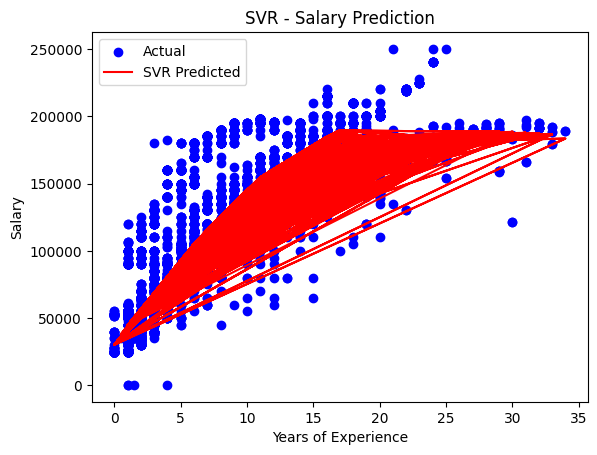

In [46]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue', label='Actual')
plt.plot(x,y_pred,color='red',label='SVR Predicted')
plt.title('SVR - Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


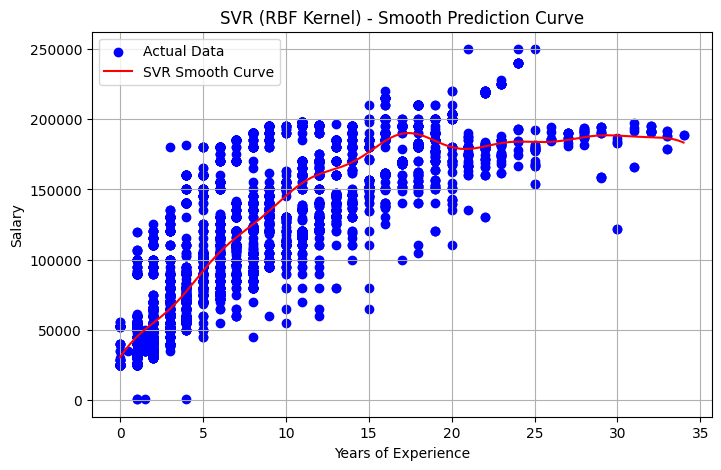

In [48]:
import numpy as np
import matplotlib.pyplot as plt
x_grid = np.arange(min(x.values.ravel()),max(x.values.ravel()),0.01)
x_grid = x_grid.reshape(-1,1)
x_grid_scaled = sc_x.transform(x_grid)
y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.scatter(x,y,color='blue', label='Actual Data')
plt.plot(x_grid,y_grid,color='red',label='SVR Smooth Curve')
plt.title('SVR (RBF Kernel) - Smooth Prediction Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

#Evaluate model performance

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)
print("MSE:",mse)
print("RMSE:", rmse)
print("R2Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R2Score: 0.7275580175081495


#Compare Kernels using code

kernel:LINEAR | R2 Score: (score:.4f)


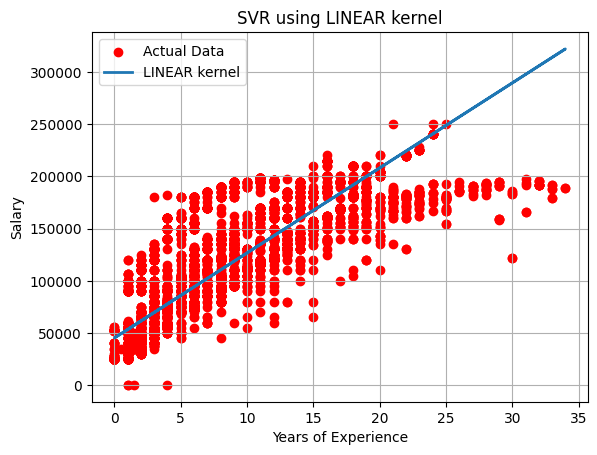

kernel:POLY | R2 Score: (score:.4f)


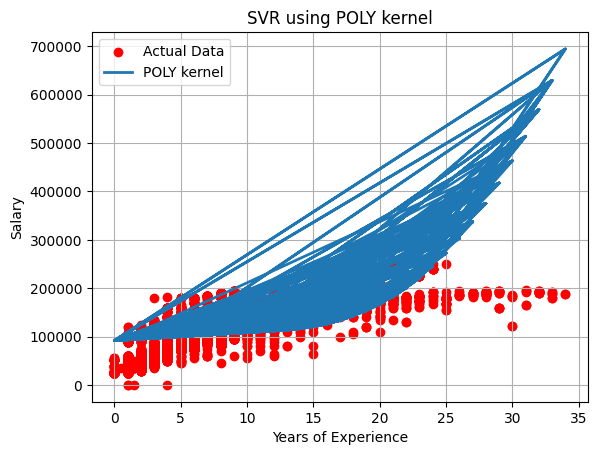

kernel:RBF | R2 Score: (score:.4f)


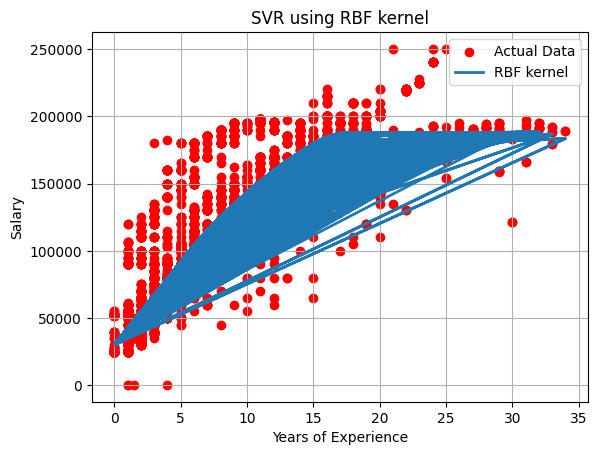

In [55]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
x = df[['Years of Experience']].values
y = df[['Salary']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel()
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
  if kernel == 'poly':
    model = SVR(kernel=kernel, degree=3)
  else:
    model = SVR(kernel=kernel)
  model.fit(x_scaled, y_scaled)
  y_pred_scaled = model.predict(x_scaled)
  y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
  score = r2_score(y,y_pred)
  print(f"kernel:{kernel.upper()} | R2 Score: (score:.4f)")
  plt.scatter(x,y,color='red', label='Actual Data')
  plt.plot(x,y_pred,label=f'{kernel.upper()} kernel',linewidth=2)
  plt.title(f'SVR using {kernel.upper()} kernel')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.legend()
  plt.show()

##Try different C and epsilon values

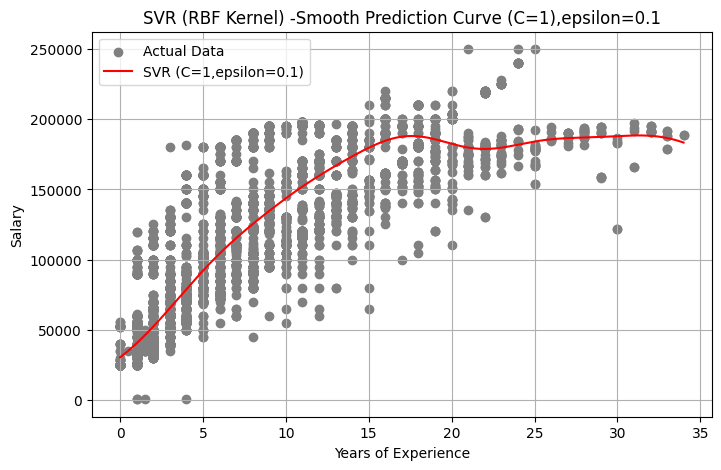

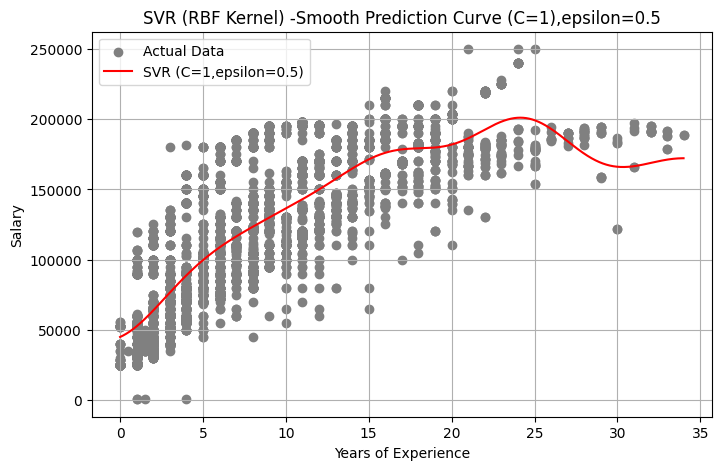

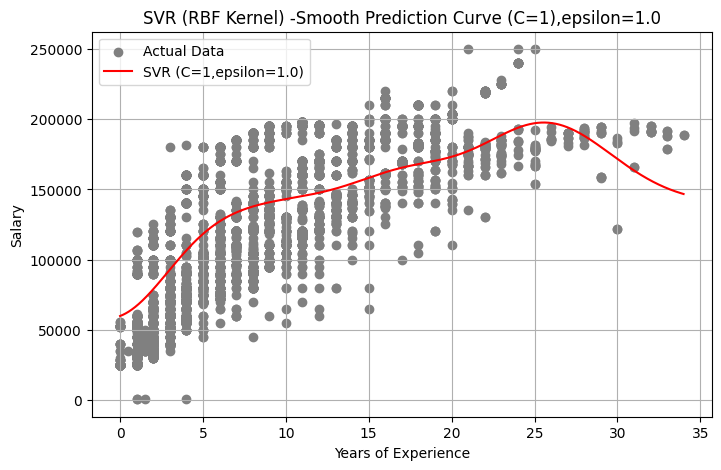

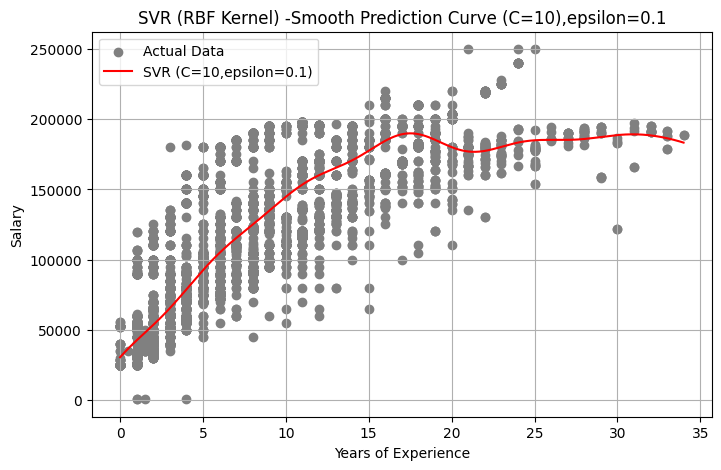

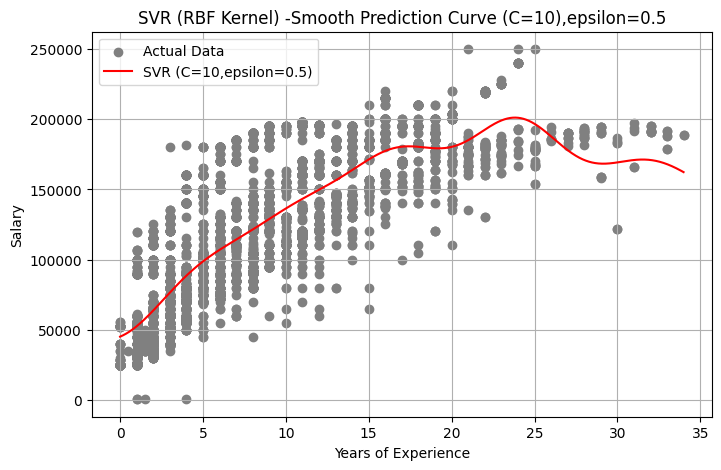

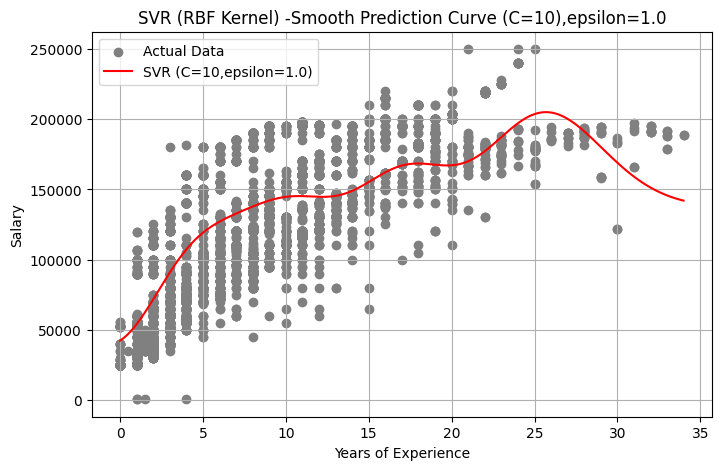

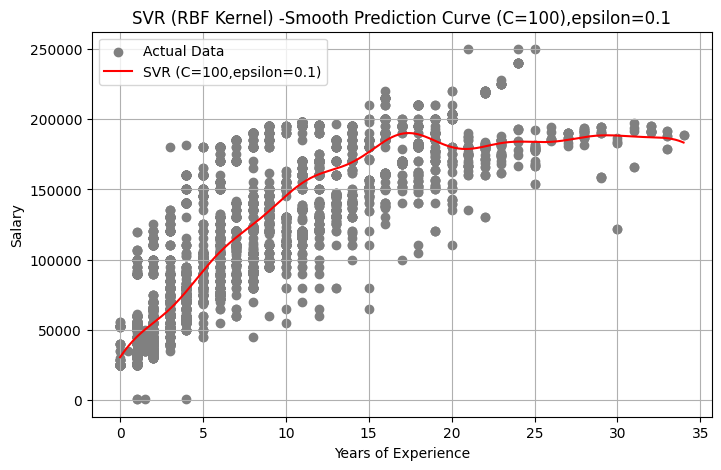

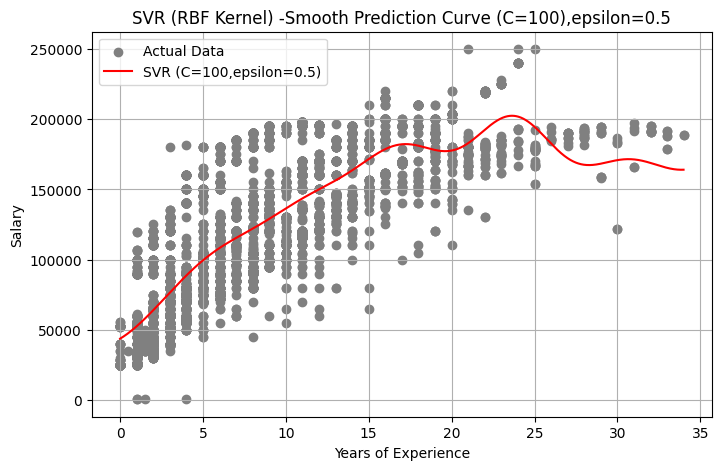

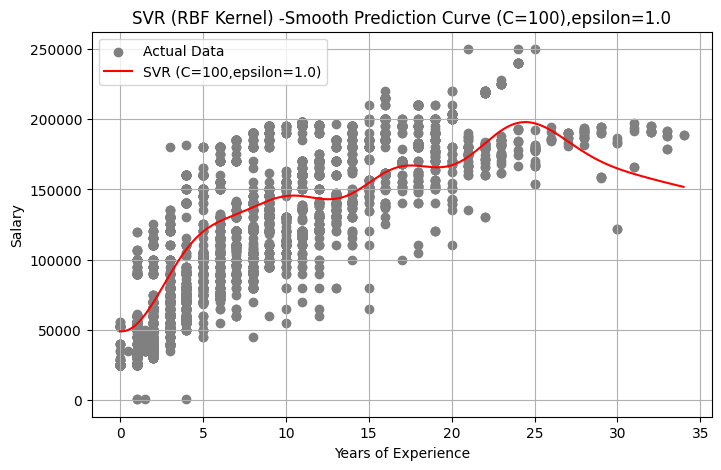

In [58]:
C_values = [1, 10, 100]
epsilon_values = [0.1,0.5,1.0]
x_grid = np.arange(min(x.ravel()),max(x.ravel()),0.01)
x_grid = x_grid.reshape(-1,1)
x_grid_scaled = sc_x.transform(x_grid)
for C in C_values:
  for eps in epsilon_values:
    svr = SVR(kernel='rbf',C=C,epsilon=eps)
    svr.fit(x_scaled,y_scaled)
    y_grid_scaled = svr.predict(x_grid_scaled)
    y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))
    plt.figure(figsize=(8,5))
    plt.scatter(x,y,color='gray', label='Actual Data')
    plt.plot(x_grid,y_grid,color='red',label=f'SVR (C={C},epsilon={eps})')
    plt.title(f"SVR (RBF Kernel) -Smooth Prediction Curve (C={C}),epsilon={eps}")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.legend()
    plt.show()